#**Parameter Analysis for the ARIMA model**

## Import the library


In [3]:
# To install the library
!pip install pmdarima
# Import the library
from pmdarima import auto_arima
import pandas as pd
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Read dataset

In [29]:
df=pd.read_csv('traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [31]:
df.shape

(48120, 4)

In [32]:
drop_col=['ID','Junction']
df.drop(drop_col,axis=1,inplace=True)

In [33]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [34]:
df= df.set_index('DateTime')
df.head()

,Vehicles
DateTime,
2015-11-01 00:00:00,15
2015-11-01 01:00:00,13
2015-11-01 02:00:00,10
2015-11-01 03:00:00,7
2015-11-01 04:00:00,9


<Axes: xlabel='DateTime'>

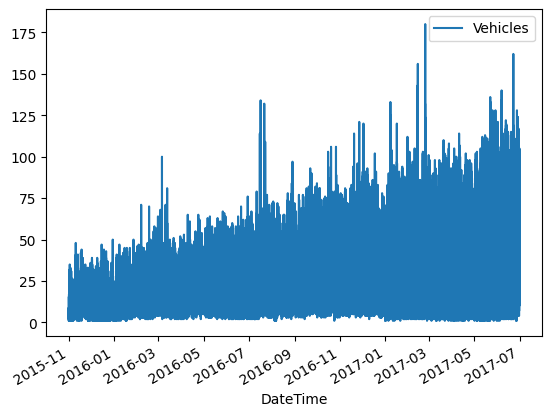

In [35]:
#Understanding the pattern
df.plot()

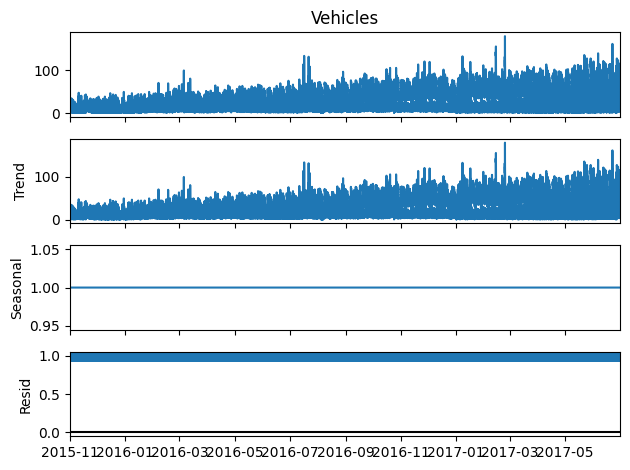

In [36]:
#Apply ETS
result = seasonal_decompose(df['Vehicles'], model='multiplicative', period=1)

#plot ETS
result.plot()
plt.show()

## Fit auto_arima function to AirPassengers dataset


In [37]:
df=df.iloc[0:1000]
df.shape

(1000, 1)

In [38]:
arime_model = auto_arima(df['Vehicles'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=6.85 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=7559.164, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5466.849, Time=2.45 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=6.01 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=7557.175, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=6137.337, Time=0.17 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=5446.815, Time=3.87 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=23.88 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.75 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=4.31 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=5390.467, Time=7.44 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=5404.484, Time=2.75 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=24.46 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.47 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=5392.460,

## To print the summary


In [39]:
arime_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1000
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -2689.235
Date:                            Wed, 21 Aug 2024   AIC                           5388.470
Time:                                    08:31:45   BIC                           5412.948
Sample:                                11-01-2015   HQIC                          5397.779
                                     - 12-12-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5989      0.028     21.505      0.000       0.544       0.654
ar.L2          0.2512      0.028      8.947      0.000       0.196       0.306
ar.S.L12      -0.8546      0.028    -30.723      0.000      -0.909      -0.800
ar.S.L24      -0.1313      0.032     -4.143      0.000      -0.193      -0.069
sigma2        13.3890      0.402     33.316      0.000      12.601      14.177
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               340.45
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.48
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fit ARIMA Model

## Split data into train / test sets


In [40]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # set one year(12 months) for testing

## Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set


In [41]:
model = SARIMAX(train['Vehicles'],
                order = (0, 1, 1),
                seasonal_order =(2, 1, 1, 12))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Vehicles   No. Observations:                  988
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -2551.558
Date:                            Wed, 21 Aug 2024   AIC                           5113.116
Time:                                    08:31:58   BIC                           5137.529
Sample:                                11-01-2015   HQIC                          5122.406
                                     - 12-12-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3658      0.026    -14.061      0.000      -0.417      -0.315
ar.S.L12      -0.2662      0.033     -8.052      0.000      -0.331      -0.201
ar.S.L24       0.3008      0.026     11.752      0.000       0.251       0.351
ma.S.L12      -0.9997      1.683     -0.594      0.553      -4.298       2.299
sigma2        10.3643     17.388      0.596      0.551     -23.716      44.444
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               698.48
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.89
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions of ARIMA Model against the test set

In [42]:
start = len(train)
end = len(train) + len(test) - 1
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

## plot predictions and actual values



<Axes: xlabel='DateTime'>

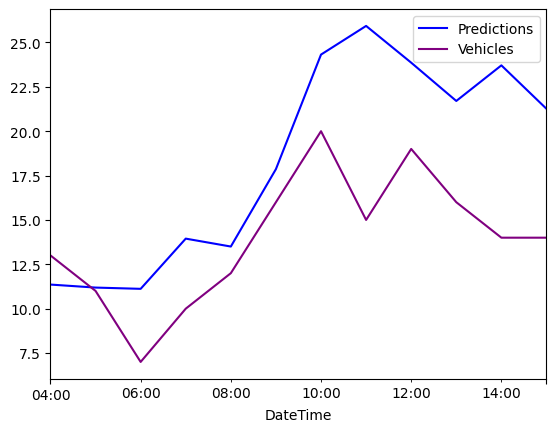

In [43]:
predictions.plot(legend=True, color='blue')
test['Vehicles'].plot(legend=True, color='purple')

## Evaluate the model using MSE and RMSE

In [44]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
# Calculate root mean squared error
rmse(test["Vehicles"], predictions)
# Calculate mean squared error
mean_squared_error(test["Vehicles"], predictions)

31.861780951201123

#**Well Done :)**